# Explore

In [1]:
import wrangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk.sentiment
import wrangle

**Prep data**

In [2]:
train, val, test = wrangle.wrangle_glassdoor()

In [3]:
train.head()

,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
490,https://www.glassdoor.com/Reviews/Perficient-R...,Perficient is an ethical company that actually...,"None at all, love, love, love this company!\nI...",Perficient,4.1,perficient is an ethical company that actually...,perficient ethical company actually value empl...,none at all love love love this company\nit is...,none love love love company good company canno...,Four,4
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3
30,https://www.glassdoor.com/Reviews/MIT-Reviews-...,"Very inspiring place to work at, to feel that ...",Depends on the project to how much organizatio...,MIT,4.4,very inspiring place to work at to feel that s...,inspiring place work feel something new happen...,depends on the project to how much organizatio...,depends project much organization team include...,Four,4
406,https://www.glassdoor.com/Reviews/Morningstar-...,"- Coworkers are amicable, and they're overall ...",- Base pay for the area could be slightly high...,Morningstar,4.1,coworkers are amicable and they're overall ve...,coworkers amicable they're overall supportive ...,base pay for the area could be slightly highe...,base pay area could slightly higher bonus prog...,Four,4
163,https://www.glassdoor.com/Reviews/ICF-Reviews-...,Loved the job and the people. Great flexibilit...,"None, I would fully recommend\nThere was disho...",ICF,3.8,loved the job and the people great flexibility...,loved job people great flexibility fun project...,none i would fully recommend\nthere was dishon...,none would fully recommend dishonest hidden in...,Three,3


**Bin ratting**

In [4]:
# Define bin edges
bin_edges = [2.0, 2.9, 3.9, 4.9]

# Define bin labels
bin_labels = ['Two', 'Three', 'Four']

# Bin the 'Values' column
train['binned_rating'] = pd.cut(train['rating'], bins=bin_edges, labels=bin_labels)
train.head(2)


,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
490,https://www.glassdoor.com/Reviews/Perficient-R...,Perficient is an ethical company that actually...,"None at all, love, love, love this company!\nI...",Perficient,4.1,perficient is an ethical company that actually...,perficient ethical company actually value empl...,none at all love love love this company\nit is...,none love love love company good company canno...,Four,4
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3


In [5]:
train.binned_rating.value_counts()

Three    405
Four     179
Two        9
Name: binned_rating, dtype: int64

## 1. Are there differences in word/words distribution between different binned star rating categories?

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

### Pros

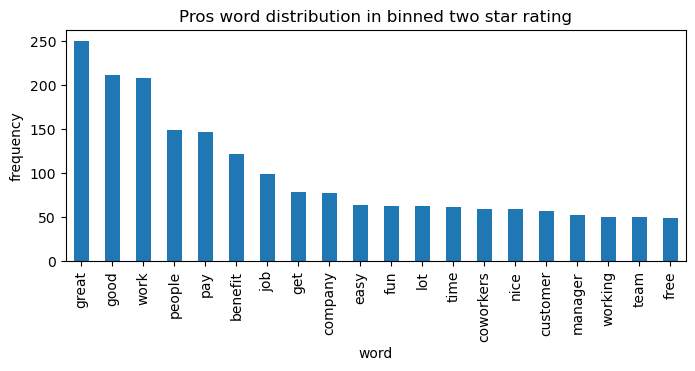

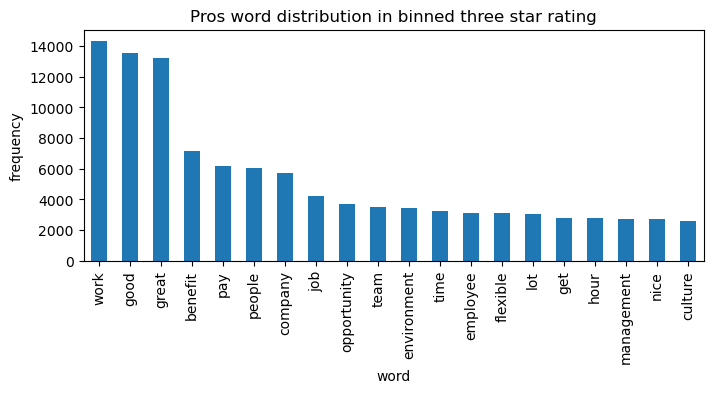

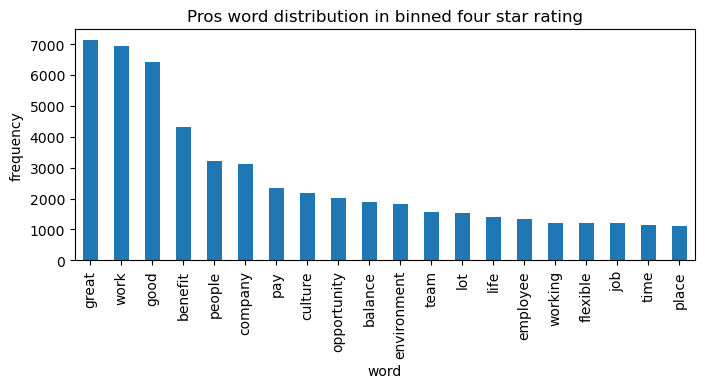

In [6]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Pros word distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


### Cons

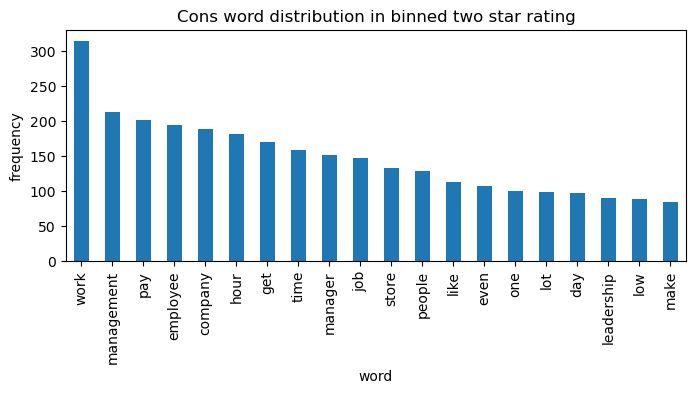

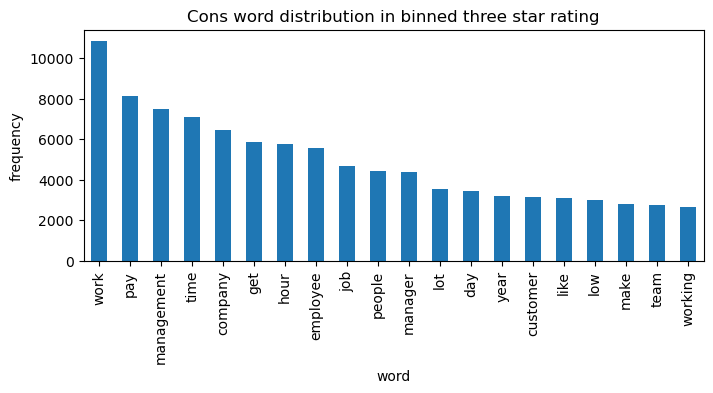

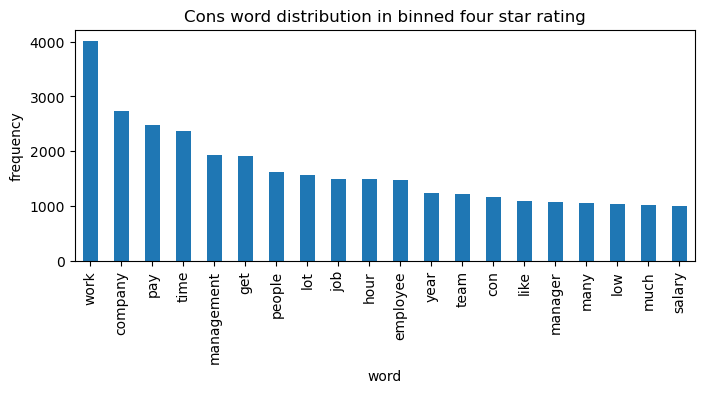

In [7]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Cons word distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


## 2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

### Pros

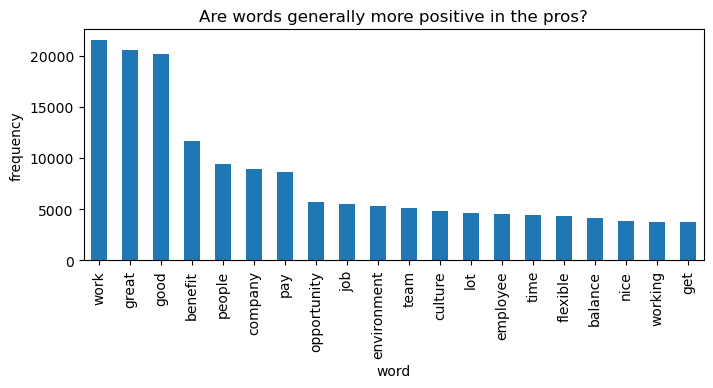

In [8]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

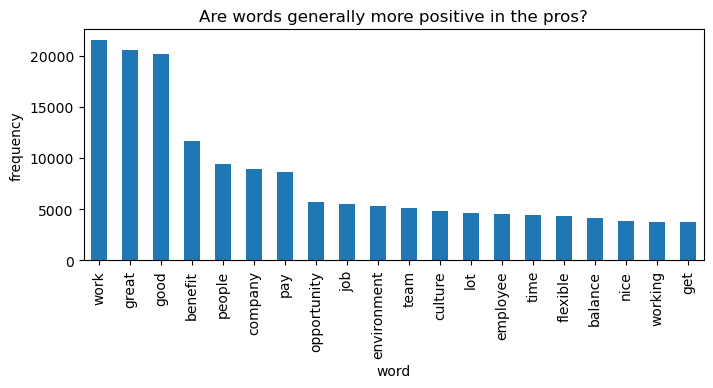

In [9]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons

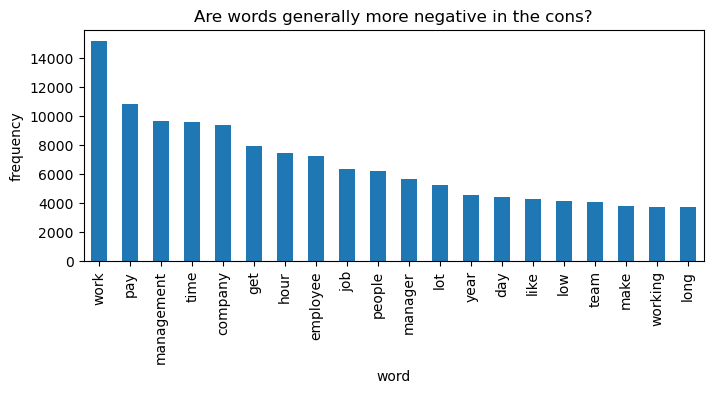

In [10]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more negative in the cons?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

## 3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

### Pros

In [11]:
# Define bin labels
bin_labels = ['Two', 'Three', "Four"]

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

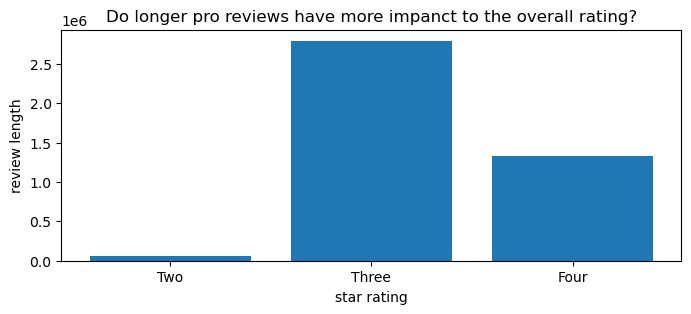

In [12]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

### Cons

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

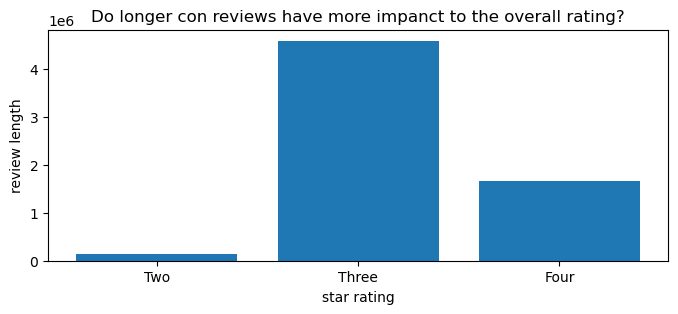

In [13]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer con reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

## 4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

In [14]:
# Define bin labels
low_bin_labels = ['Two', 'Three', "Four"]
high_bin_labels = ['Four']

### Low stars and positive sentiment (Combined pros and cons for each star)

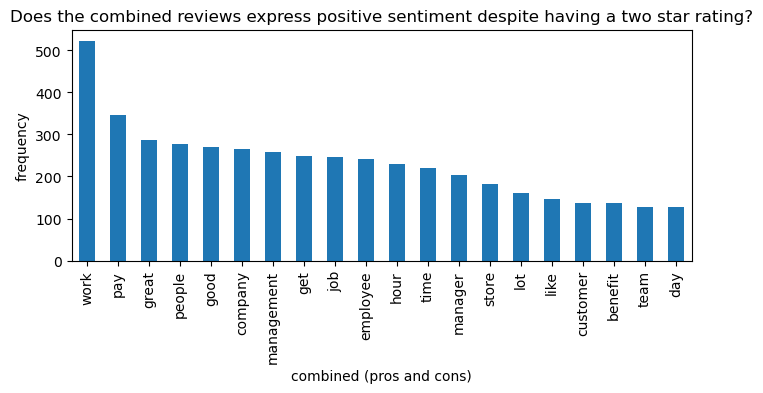

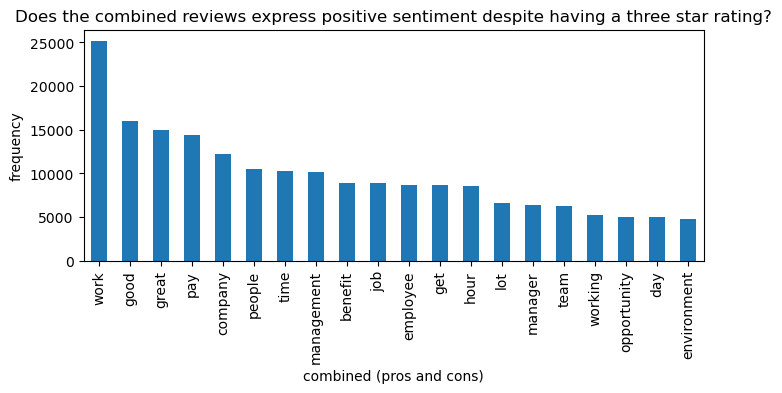

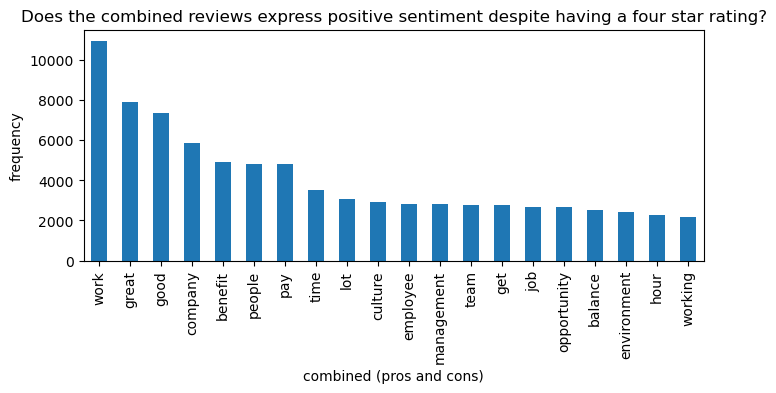

In [15]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### high stars and negative sentiment (Combined pros and cons for each star)

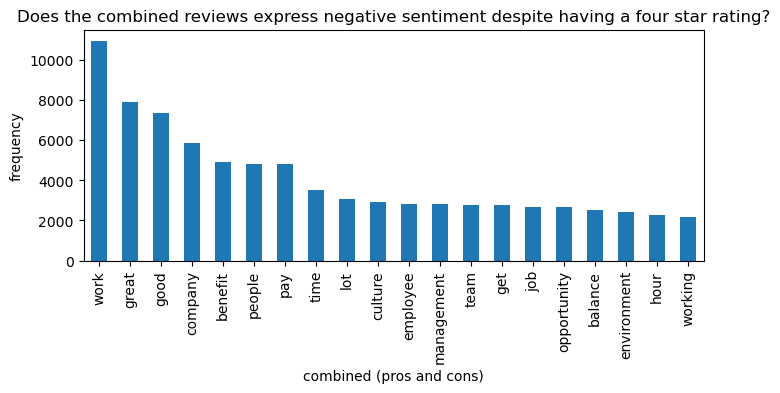

In [16]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

## 5. Are there any words that uniquely identify pros and cons?

In [17]:
# get the word frequencies for each category
pros_freq = pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts()
cons_freq = pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_freq = pd.Series(pros_cons_str.split()).value_counts()
all_freq

work             36685
good             23640
great            23128
pay              19495
company          18321
                 ...  
rollingrandom        1
multimethod          1
anythinghelp         1
polling              1
bffs                 1
Length: 31779, dtype: int64

In [18]:
# concat all frequencies together into a dataframe
word_freq= pd.concat([pros_freq, cons_freq, all_freq], axis=1).fillna(0).astype(int)
word_freq.columns = ['pros_freq', 'cons_freq', 'all_freq']

word_freq

,pros_freq,cons_freq,all_freq
work,21492,15193,36685
great,20579,2549,23128
good,20196,3444,23640
benefit,11614,2327,13941
people,9397,6179,15576
...,...,...,...
razor,0,1,1
supervisorsmanagersadministration,0,1,1
baffled,0,1,1
unrealstic,0,1,1


### Pros

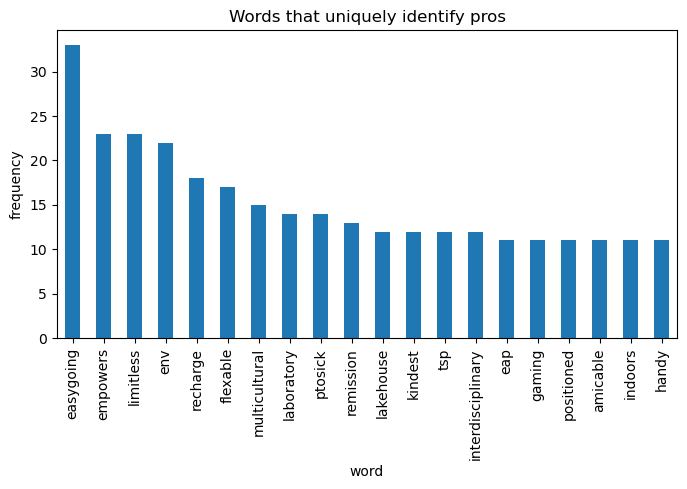

In [28]:
word_freq.pros_freq[word_freq.cons_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Words that uniquely identify pros")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons

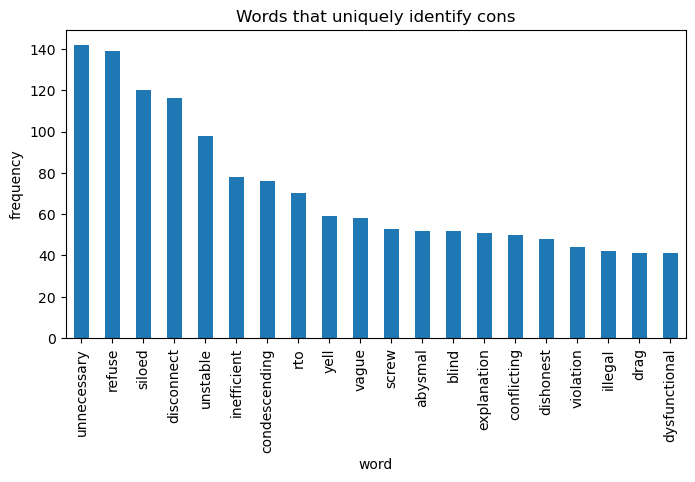

In [29]:
word_freq.cons_freq[word_freq.pros_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Words that uniquely identify cons")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### 6. What are the top words found in both pros and cons

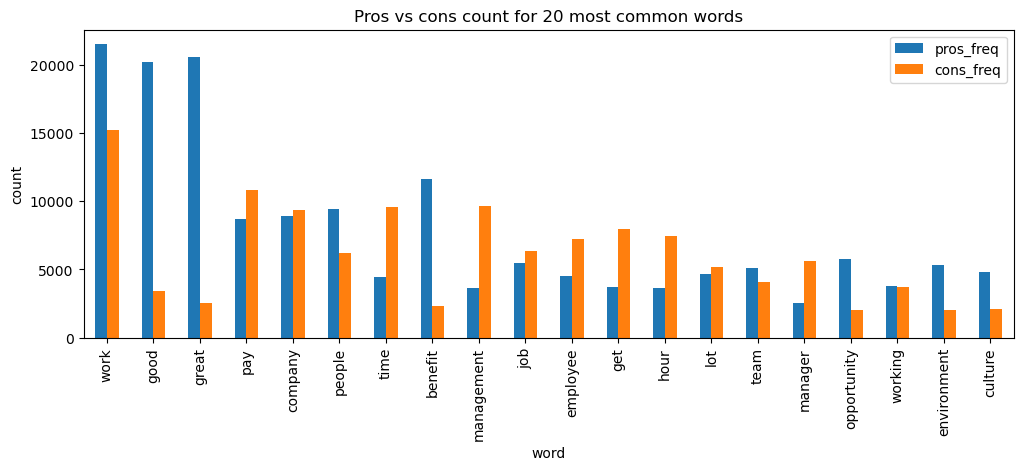

In [30]:
# plot most common words
word_freq.sort_values('all_freq', ascending=False)[['pros_freq', 'cons_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common words")
plt.xlabel("word")
plt.ylabel("count")
plt.show()

## 7. Identify the sentiment score for each company revies

In [31]:
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [32]:
# grab the sentiment from each of the texts as they stand:
# apply a lambda function on each cell in the text column:
# polarity_score's value associtated with the "compound"
# key for each score
train['pros_sentiment'] = train.pros_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
train['cons_sentiment'] = train.cons_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [33]:
train[["name","pros_lemmatized", "pros_lemmatized","pros_sentiment", "cons_sentiment"]].head()

,name,pros_lemmatized,pros_lemmatized,pros_sentiment,cons_sentiment
490,Perficient,perficient ethical company actually value empl...,perficient ethical company actually value empl...,1.0,0.9995
273,Farmers Insurance Group,company best ever large established company so...,company best ever large established company so...,1.0,0.9983
677,MIT,inspiring place work feel something new happen...,inspiring place work feel something new happen...,1.0,0.9892
406,Morningstar,coworkers amicable they're overall supportive ...,coworkers amicable they're overall supportive ...,1.0,0.9968
953,ICF,loved job people great flexibility fun project...,loved job people great flexibility fun project...,1.0,0.9992


### Pros

Text(0.5, 1.0, 'Pros sentiment distribution')

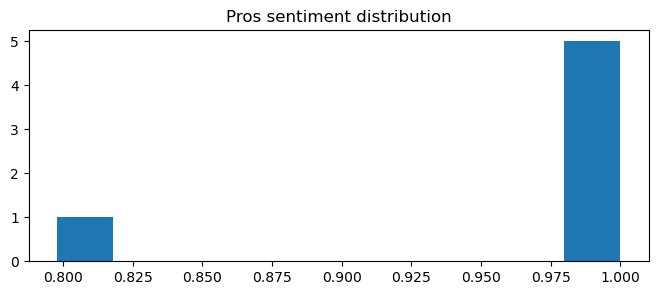

In [34]:
plt.figure(figsize=(8,3))
plt.hist(train.pros_sentiment.value_counts().index)
plt.title("Pros sentiment distribution")

### Cons

Text(0.5, 1.0, 'Pros sentiment distribution')

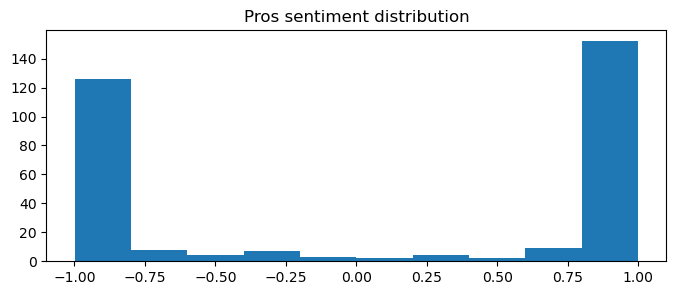

In [35]:
plt.figure(figsize=(8,3))
plt.hist(train.cons_sentiment.value_counts().index)
plt.title("Pros sentiment distribution")

## Take aways

- Nothing found in one star or 5 star

## With more time
- word count
- stopword count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio